# MSL719 Term Paper

### Team Members:
1. K Shreya
2. Ananya Ojha
3. Shubham Gaba
4. Sreya Babu 
5. M T Dilip Kumar 

---
# Analysis of Exam Scores Data

**Introduction**

In this project, we looked at a dataset consisting of a sample of American high school students, their backgrounds and their performance in tests. We performed a variety of statistical analyses to find out what were the significant factors determining student test scores.

**About the Dataset**:

This dataset has been obtained from this [source](http://roycekimmons.com/tools/generated_data/exams). Its description says:

    This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them. It is a randomly generated fictional dataset only to be used for educational purposes.

The dataset contains details of 1,000 students.

---

**Tools and Techniques**:

We have primarily used Python and its host of data analysis and visualisation tools
- Pandas: Data Manipulation Library
- seabornL Visualisation Library
- matplotlib: Visualisation Library
- scikit-learn: Linear Regression Library

---

Let us import all the necessary libraries for the code to function:

In [67]:
# Importing all necessary libraries:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
pd.set_option("display.max_columns", 100)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

---

## Data Preparation and Cleaning

In this section, we will do the following actions:
- Load the dataset into a data frame using Pandas
- Obtain info about the rows and columns in the dataset
- Remove or edit null and absent values
- Do other edits to the dataset for our convenience

**Loading the Dataset:**
We will load the dataset we obtained from Kaggle into a DataFrame using *read_csv()* function in Pandas


In [68]:
# Loading csv file to DataFrame:
df = pd.read_csv("StudentsPerformance.csv", encoding= 'unicode_escape')

Let us take a small glance at the data:

In [69]:
# Listing first 5 rows using .head() function:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,bachelor's degree,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,diploma,free,none,47,57,44
4,male,group C,bachelor's degree,standard,none,76,78,75


**Exploring Rows and Columns:**
Now, let us take a look at the number of rows and columns, range of values and datatypes using the *df.info()* function. 

In [70]:
# .info() function provides an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Our dataset has:
- 1,000 rows
- 8 columns

We can also see the different columns:
1. **Gender**
2. **Race/Ethnicity**: Anonymised into 5 distinct groups
3. **Parental Level of Education**
4. **Lunch**: Type of lunch obtained by the student
5. **Test Preparation Course**: Whether student underwent a prep course
6. **Math Score**
7. **Reading Score**
8. **Writing Score**

**Handling Missing Data**:
Let us first take a look at the missing data:

In [71]:
# .isnull() function gives us number of null entries in each column
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


There are no empty values, so we can proceed with the analysis.

---

## Descriptive Statistics

In this section, we'll analyse the data in each column and also visualise the results.

---

#### 1. Gender:
First, let us find the frequencies of the genders

In [72]:
gender_count = df['gender'].value_counts()
gender_count

female    518
male      482
Name: gender, dtype: int64

Now, let us visualise the above results:

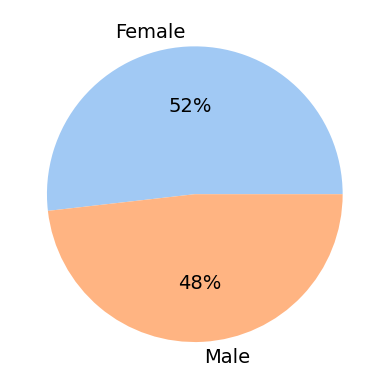

In [73]:
mylabels = ['Female', 'Male']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(gender_count, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.show()

**Interpretation**

We see girls slightly outnumber the boys

---

#### 2. Race/Ethnicity:

First, let us find the frequencies of the various groups

In [74]:
race_count = df['race/ethnicity'].value_counts()
race_count

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

On visualising this data, we get

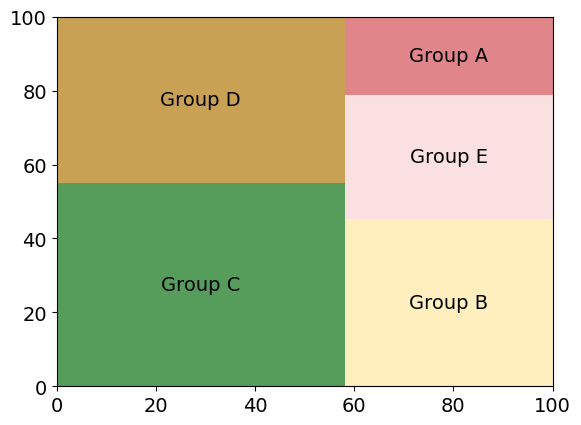

In [75]:
mylabels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
labels = ['A', 'B', 'C', 'D', 'E']
color_list = ['#0f7216', '#b2790c', '#ffe9a3', '#f9d4d4', '#d35158', '#ea3033']
plt.rc('font', size=14)
squarify.plot(sizes=race_count, label=mylabels, color=color_list, alpha=0.7)
plt.axis('on')
plt.show()

**Interpretation**

Group C is the largest group, while group A is the smallest.

---

#### 3. Parental Level of Education:

First, let us find the frequencies of the levels of education

In [76]:
edu_count = df['parental level of education'].value_counts()
edu_count

high school          375
bachelor's degree    344
diploma              222
master's degree       59
Name: parental level of education, dtype: int64

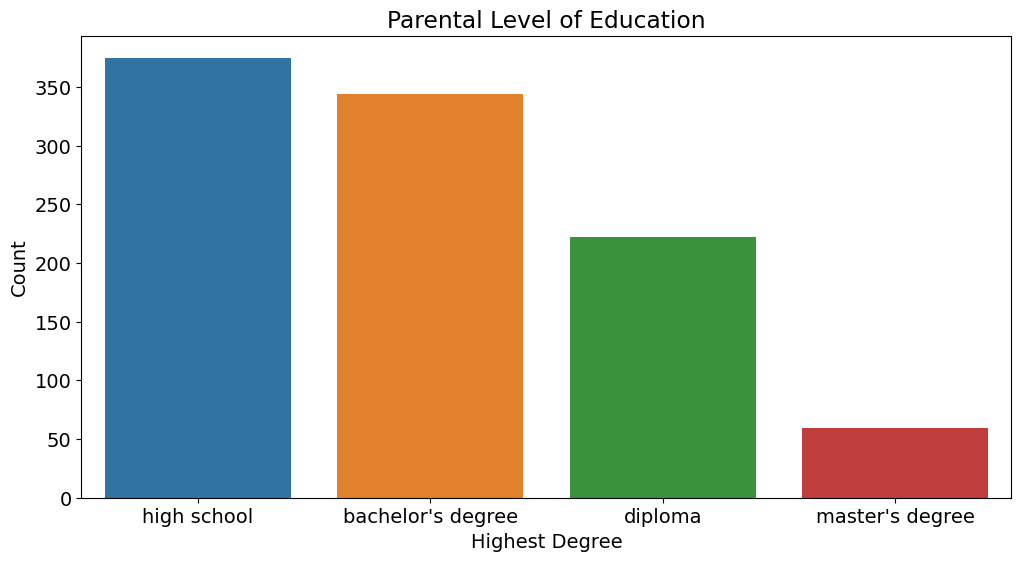

In [77]:
# Plotting a bar graph for the above results
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Parental Level of Education')
fig = sns.barplot(x=edu_count.index , y= edu_count)
plt.xlabel('Highest Degree')
plt.ylabel("Count")

plt.show(fig)

**Interpretation**

Most parents only have a high school education. However, a similar number of parents have a bachelor's degree.

---

#### 4. Lunch Type

There are two types of lunch:
- Standard 
- Free, which is a reduced meal

In [78]:
lunch_count = df['lunch'].value_counts()
lunch_count

standard    645
free        355
Name: lunch, dtype: int64

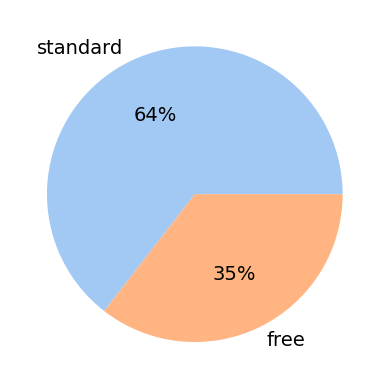

In [79]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(lunch_count, labels = lunch_count.index, colors = colors, autopct='%.0f%%')
plt.show()

**Interpretation**

Majority of the students opted for the standard lunch

---

#### 5. Test Preparation Course

In [80]:
prep_count = df['test preparation course'].value_counts()
prep_count

none         642
completed    358
Name: test preparation course, dtype: int64

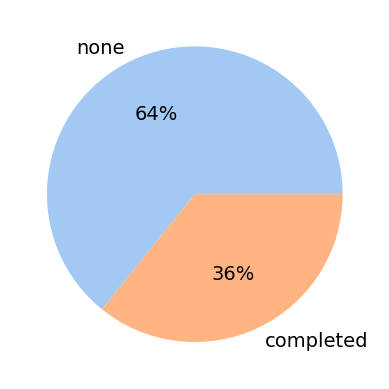

In [81]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(prep_count, labels = prep_count.index, colors = colors, autopct='%.0f%%')
plt.show()

**Interpretation**

Only a third of the students underwent a test preparation course

---

#### 6. Math Scores

**Measures of Central Tendency**

In [82]:
# Mean:
print("Mean of Math Score is: ", df['math score'].mean())
print("Median of Math Score is: ", df['math score'].median())
print("Mode of Math Score is: ", df['math score'].mode()[0])

Mean of Math Score is:  66.089
Median of Math Score is:  66.0
Mode of Math Score is:  65


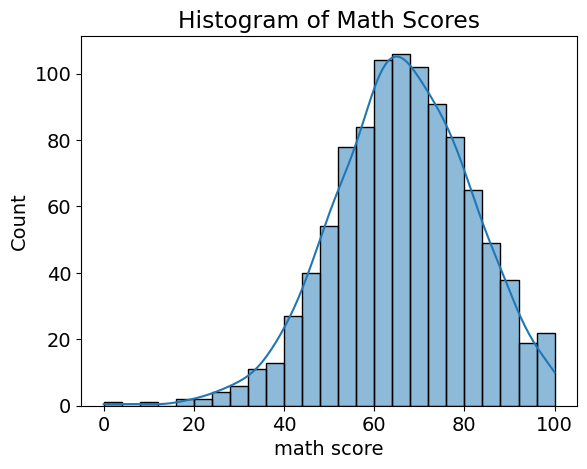

In [83]:
# Plotting histogram using seaborn library
plt.title('Histogram of Math Scores')
sns.histplot(data = df, x = "math score", kde=True)
plt.show()

#### 7. Reading Score

**Measures of Central Tendency**

In [84]:
# Mean:
print("Mean of Reading Score is: ", df['reading score'].mean())
print("Median of Reading Score is: ", df['reading score'].median())
print("Mode of Reading Score is: ", df['reading score'].mode()[0])

Mean of Reading Score is:  69.169
Median of Reading Score is:  70.0
Mode of Reading Score is:  72


**Histogram**

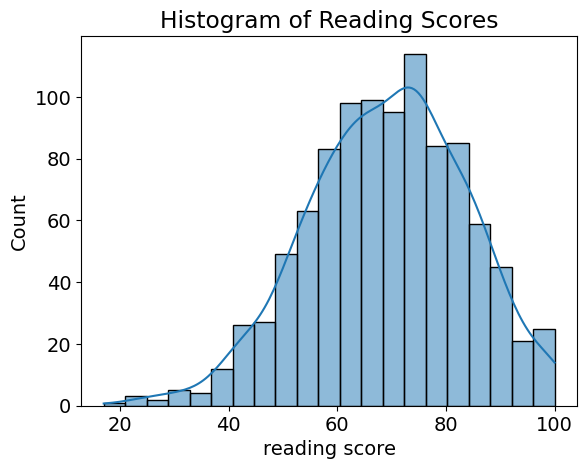

In [85]:
# Plotting histogram using seaborn library
plt.title('Histogram of Reading Scores')
sns.histplot(data = df, x = "reading score", kde=True)
plt.show()

#### 8. Writing Score

**Measures of Central Tendency**

In [86]:
# Mean:
print("Mean of Writing Score is: ", df['writing score'].mean())
print("Median of Writing Score is: ", df['writing score'].median())
print("Mode of Writing Score is: ", df['writing score'].mode()[0])

Mean of Writing Score is:  68.054
Median of Writing Score is:  69.0
Mode of Writing Score is:  74


**Histogram**

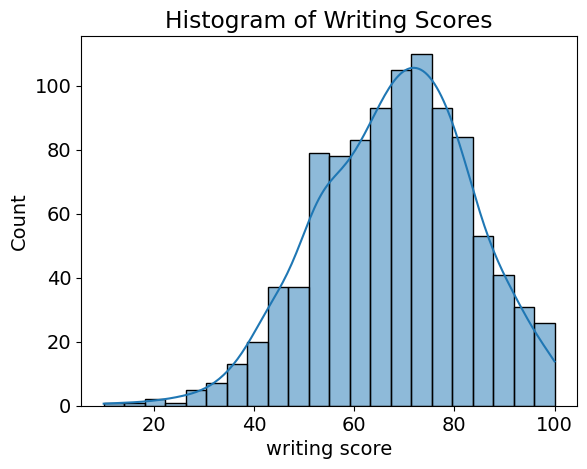

In [87]:
# Plotting histogram using seaborn library
plt.title('Histogram of Writing Scores')
sns.histplot(data = df, x = "writing score", kde=True)
plt.show()

**Interpretation**

Math scores are the lowest on average, while the samples scores highest in reading

----

## Hypothesis Testing

In this section, we test the validity of various hypotheses by using statistical techniques

---

#### 1. Do Boys and Girls perform similar in Math?

**Test to be used**: t-test

**Significance**: 0.05

**Null Hypothesis**: Mean of Boys' math scores = Mean of Girls' math scores

But before we apply the t-test, we have to check if both groups have equal variances

In [88]:
# t-test to compare performance in math between boys and girls
#define samples
from scipy.stats import ttest_ind
group1 = df[df['gender']=='male']
group2 = df[df['gender']=='female']

print(group1['math score'].var())
print(group2['math score'].var())

206.10269493879454
239.98512355959164


Since variances are not very different, we can proceed with the t-test

In [89]:
#perform independent two sample t-test
ttest_ind(group1['math score'], group2['math score'])

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

**Interpretation**

**p-value**: 9.1e-8 which is less than 5e-2.

Hence null hypothesis is rejected. Therefore, boys and girls perform differently in math.

----

#### 2. Is the Writing Score of the students affected by Parental Education Level or not?

**Test to be Used**: ANOVA

**Significance**: 0.05

**Null Hypothesis**: There is no significance difference in the writing score of students with respect to their parental education level

In [90]:
from scipy.stats import f_oneway

group1 = df[df['parental level of education']=='high school']
group2 = df[df['parental level of education']=='diploma']
group3 = df[df['parental level of education']=="bachelor's degree"]
group4 = df[df['parental level of education']=="master's degree"]

f_oneway(group1['writing score'], group2['writing score'], group3['writing score'], group4['writing score'])


F_onewayResult(statistic=20.585930860374937, pvalue=6.028526555401061e-13)

**Interpretation**

**p-value**: 6.02e-13 which is less than 5e-2.

Hence null hypothesis is rejected. Therefore, parental education level affects their child's writing score.

----

#### 3. Is Test Preparation correlated with Better Scores?

For this, we perform a correlation analysis between test scores and the test preparation completion.

We use Point-Biserial Correlation since we're correlating a binary nominal variable with a continous variable

(a) **Math Scores**

In [91]:
group1 = df[df['test preparation course']=='completed']
group2 = df[df['test preparation course']=='none']

group2 = group2.iloc[0:358]

import scipy.stats as stats
#calculate point-biserial correlation
stats.pointbiserialr(group1['math score'], group2['math score'])

PointbiserialrResult(correlation=0.11494966744049467, pvalue=0.02966337834177113)

**Interpretation**

There is a positive correlation, and it is significant since p-value is less than 0.05

(b) **Reading Scores**

In [92]:
group1 = df[df['test preparation course']=='completed']
group2 = df[df['test preparation course']=='none']

group2 = group2.iloc[0:358]

#calculate point-biserial correlation
stats.pointbiserialr(group1['reading score'], group2['reading score'])

PointbiserialrResult(correlation=0.08011597797609418, pvalue=0.13028041104235646)

**Interpretation**

There is a positive correlation, but it is not significant since p-value is greater than 0.05

(c) **Writing Scores**

In [93]:
group1 = df[df['test preparation course']=='completed']
group2 = df[df['test preparation course']=='none']

group2 = group2.iloc[0:358]

#calculate point-biserial correlation
stats.pointbiserialr(group1['writing score'], group2['writing score'])

PointbiserialrResult(correlation=0.11138985982969485, pvalue=0.0351362451908745)

**Interpretation**

There is a positive correlation, and it is significant since p-value is less than 0.05

----

#### 4. How are Gender, Ethnicity and Lunch Program related to the Average Test Score?

For this, we use regression analysis.

In [94]:
## Calculating Average Test Score
df['average score'] = (df['math score']+df['reading score'] + df['writing score'])/3

## Regression Analysis:
from sklearn.linear_model import LinearRegression

df['gender'] = pd.factorize(df['gender'])[0]
df['race/ethnicity'] = pd.factorize(df['race/ethnicity'])[0]
df['lunch'] = pd.factorize(df['lunch'])[0]

X = pd.DataFrame(np.c_[df['gender'], df['race/ethnicity'], df['lunch']], columns=['gender','race/ethnicity', 'lunch'])
Y = df['average score']

model = LinearRegression()
model.fit(X, Y)

from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          average score   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     47.01
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.04e-28
Time:                        00:34:01   Log-Likelihood:                -4009.5
No. Observations:                1000   AIC:                             8027.
Df Residuals:                     996   BIC:                             8047.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             70.0335      0.870     80.

**Interpretation**

**Coefficients**
- Coefficients of gender, race and lunch are -4.15, 1.52 and -8.6 respectively
- Intercept is 70
- p-value of all coefficients is less than 0.05, hence they're significant

Therefore, the model is Average Score = -4.15\*Gender + 1.52\*Race - 8.6*Lunch + 70


----

## Conclusion:

In this analysis, we have first looked at the characteristics of the dataset. Then we have answered various questions using statistical analysis.

1. All of our null hypotheses were rejected. We found out that girls and boys perform differently in their math test and that writing score is affected by how well-educated the parents of the students are.
2. Our correlation analysis showed that only math and writing scores are significantly correlated to test prep completion. Reading is unaffected.
3. And from the regression analysis, we inferred that gender, race and lunch program were significant factors in determining average test scores of the students.

---